In [35]:
import glob
import os

import numpy as np
import pandas as pd
import scipy.signal

# Image processing tools
import skimage
import skimage.io

import bebi103

import matplotlib.pyplot as plt
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14}
sns.set(rc=rc)
%matplotlib inline

# Import Bokeh modules for interactive plotting
import bokeh
bokeh.io.output_notebook()

Loading BokehJS ...

In [36]:
# The directory containing daytime data
data_dir = '../data/Cassiopea_Pulsation/day'

# Glob string for images
im_glob = os.path.join(data_dir, '*.TIF')

# Get list of files in directory
im_list = glob.glob(im_glob)

# Let's look at the first 10 entries
im_list[:10]

['../data/Cassiopea_Pulsation/day\\Frame_545000.TIF',
 '../data/Cassiopea_Pulsation/day\\Frame_545001.TIF',
 '../data/Cassiopea_Pulsation/day\\Frame_545002.TIF',
 '../data/Cassiopea_Pulsation/day\\Frame_545003.TIF',
 '../data/Cassiopea_Pulsation/day\\Frame_545004.TIF',
 '../data/Cassiopea_Pulsation/day\\Frame_545005.TIF',
 '../data/Cassiopea_Pulsation/day\\Frame_545006.TIF',
 '../data/Cassiopea_Pulsation/day\\Frame_545007.TIF',
 '../data/Cassiopea_Pulsation/day\\Frame_545008.TIF',
 '../data/Cassiopea_Pulsation/day\\Frame_545009.TIF']

In [37]:
im = skimage.io.imread(im_list[0])

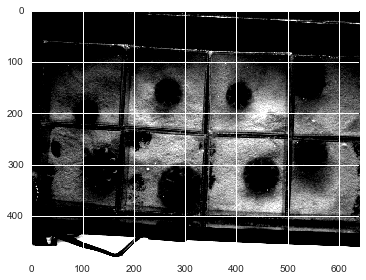

In [38]:
im = im[:,:,0]
skimage.io.imshow(im);

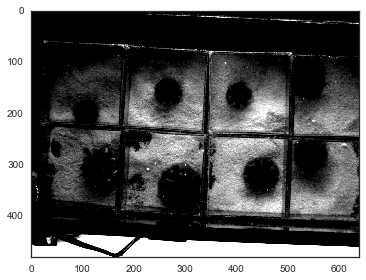

In [39]:
with sns.axes_style('white'):
    skimage.io.imshow(im)

In [40]:
# Jellyfish 1
verts = [(26.735349615665427, 58.274273045821303), (25.489542592753367, 211.5085368640049), (174.98638534220078, 225.21241411603756), (186.19864854840932, 65.749115183293668)]

In [41]:
ic = skimage.io.ImageCollection(im_glob, conserve_memory=True)
len(ic)

4000

In [42]:
def squish_rgb(fname, **kwargs):
    """
    Only take one channel. (Need to explicitly have the **kwargs to play
    nicely with skimage.io.ImageCollection.)
    """
    im = skimage.io.imread(fname)
    return im[:,:,0]

ic = skimage.io.ImageCollection(im_glob, conserve_memory=True, 
                                load_func=squish_rgb)

In [43]:
fps = 15
t = np.arange(0, len(ic)) / fps

In [44]:
roi, roi_bbox, roi_box = bebi103.verts_to_roi(verts, *ic[0].shape)

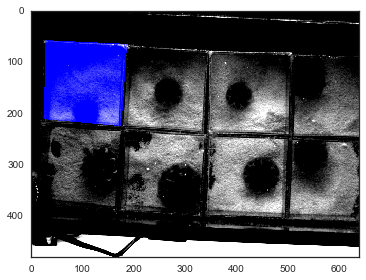

In [45]:
# Make grayscale image that is now RGB
im = np.dstack(3*[skimage.img_as_float(ic[0])])

# Max out blue channel
im[roi,2] = skimage.dtype_limits(im)[1]

# Look at the image
with sns.axes_style('white'):
    skimage.io.imshow(im)

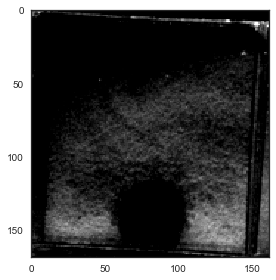

In [46]:
# Define load_func that only gives region bounding ROI
def load_roi(fname, roi_bbox=None, **kwargs):
    """
    Image loading function to only load ROI.
    """
    if roi_bbox is None:
        return skimage.io.imread(fname)[:,:,0]
    else:
        return skimage.io.imread(fname)[:,:,0][roi_bbox]

# Load image collection
ic = skimage.io.ImageCollection(im_glob, conserve_memory=True, 
                                load_func=load_roi, roi_bbox=roi_bbox)

# Look at first image
with sns.axes_style('white'):
    skimage.io.imshow(ic[0])

In [53]:
# Set up NumPy array to store total pixel intensity
total_int = np.empty(len(t))

# Look through and compute total intensity in the ROI
for i, im in enumerate(ic):
    total_int[i] = ic[i][roi_box].sum()

C:\Users\andre_000\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:1794: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


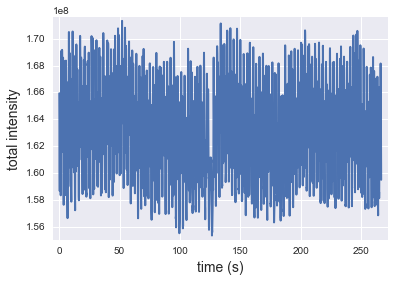

In [54]:
plt.plot(t, total_int)
plt.xlabel('time (s)')
plt.ylabel('total intensity')
plt.margins(0.02)

In [64]:
total_int -= total_int.mean()
total_int = 1 + 2 / (total_int.max() - total_int.min()) \
                * (total_int - total_int.max())

In [50]:
p = bokeh.plotting.figure(height=300, width=650, x_axis_label='time (s)',
                          y_axis_label='normalized intensity')
p.line(t, total_int, line_join='bevel')
bokeh.io.show(p)

In [20]:
# Jellyfish 2
verts1 = [(181.21542045676108, 66.994922206205729), (177.4779993880249, 223.9666070931255), (338.18710534368086, 235.17887029933411), (345.66194748115322, 79.452992435326337)]

In [21]:
ic = skimage.io.ImageCollection(im_glob, conserve_memory=True)
def squish_rgb(fname, **kwargs):
    """
    Only take one channel. (Need to explicitly have the **kwargs to play
    nicely with skimage.io.ImageCollection.)
    """
    im = skimage.io.imread(fname)
    return im[:,:,0]

ic = skimage.io.ImageCollection(im_glob, conserve_memory=True, 
                                load_func=squish_rgb)
fps = 15
t = np.arange(0, len(ic)) / fps
roi1, roi_bbox1, roi_box1 = bebi103.verts_to_roi(verts1, *ic[0].shape)

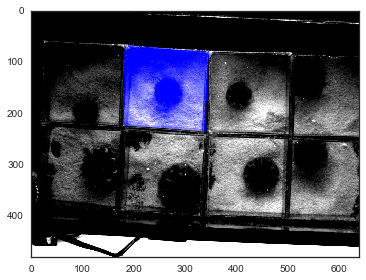

In [22]:
# Make grayscale image that is now RGB
im = np.dstack(3*[skimage.img_as_float(ic[0])])

# Max out blue channel
im[roi1,2] = skimage.dtype_limits(im)[1]

# Look at the image
with sns.axes_style('white'):
    skimage.io.imshow(im)

In [23]:
# Set up NumPy array to store total pixel intensity
total_int = np.empty(len(t))

# Look through and compute total intensity in the ROI
for i, im in enumerate(ic):
    total_int[i] = ic[i][roi_box1].sum()

C:\Users\andre_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 480 but corresponding boolean dimension is 169
C:\Users\andre_000\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:1794: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


KeyboardInterrupt: 

In [ ]:
plt.plot(t, total_int)
plt.xlabel('time (s)')
plt.ylabel('total intensity')
plt.margins(0.02)

In [ ]:
total_int -= total_int.mean()
total_int = 1 + 2 / (total_int.max() - total_int.min()) \
                * (total_int - total_int.max())

In [34]:
p = bokeh.plotting.figure(height=300, width=650, x_axis_label='time (s)',
                          y_axis_label='normalized intensity')
p.line(t, total_int, line_join='bevel')
bokeh.io.show(p)

In [35]:
# Jellyfish 3
verts2 = [(343.1703334353291, 76.961378389502215), (339.43291236659292, 236.42467732224617), (501.38782534516099, 243.89951945971853), (507.61686045972124, 79.452992435326337)]


In [36]:
ic = skimage.io.ImageCollection(im_glob, conserve_memory=True)
def squish_rgb(fname, **kwargs):
    """
    Only take one channel. (Need to explicitly have the **kwargs to play
    nicely with skimage.io.ImageCollection.)
    """
    im = skimage.io.imread(fname)
    return im[:,:,0]

ic = skimage.io.ImageCollection(im_glob, conserve_memory=True, 
                                load_func=squish_rgb)
fps = 15
t = np.arange(0, len(ic)) / fps
roi2, roi_bbox2, roi_box2 = bebi103.verts_to_roi(verts2, *ic[0].shape)

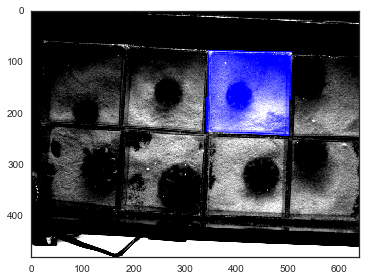

In [37]:
# Make grayscale image that is now RGB
im = np.dstack(3*[skimage.img_as_float(ic[0])])

# Max out blue channel
im[roi2,2] = skimage.dtype_limits(im)[1]

# Look at the image
with sns.axes_style('white'):
    skimage.io.imshow(im)

In [38]:
# Set up NumPy array to store total pixel intensity
total_int = np.empty(len(t))

# Look through and compute total intensity in the ROI
for i, im in enumerate(ic):
    total_int[i] = ic[i][roi_box2].sum()

C:\Users\andre_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 480 but corresponding boolean dimension is 168
C:\Users\andre_000\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:1794: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


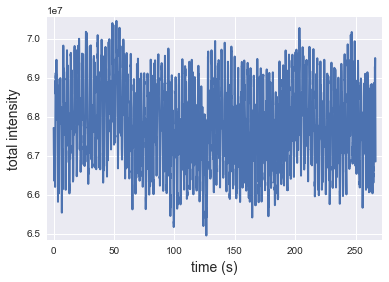

In [39]:
plt.plot(t, total_int)
plt.xlabel('time (s)')
plt.ylabel('total intensity')
plt.margins(0.02)

In [40]:
total_int -= total_int.mean()
total_int = 1 + 2 / (total_int.max() - total_int.min()) \
                * (total_int - total_int.max())

In [41]:
p = bokeh.plotting.figure(height=300, width=650, x_axis_label='time (s)',
                          y_axis_label='normalized intensity')
p.line(t, total_int, line_join='bevel')
bokeh.io.show(p)

In [42]:
# Jellyfish 4
verts3 = [(506.37105343680923, 83.190413504062519), (503.87943939098511, 240.16209839098235), (638.42659786548768, 248.88274755136678), (635.93498381966356, 90.665255641534884)]

In [43]:
ic = skimage.io.ImageCollection(im_glob, conserve_memory=True)
def squish_rgb(fname, **kwargs):
    """
    Only take one channel. (Need to explicitly have the **kwargs to play
    nicely with skimage.io.ImageCollection.)
    """
    im = skimage.io.imread(fname)
    return im[:,:,0]

ic = skimage.io.ImageCollection(im_glob, conserve_memory=True, 
                                load_func=squish_rgb)
fps = 15
t = np.arange(0, len(ic)) / fps
roi3, roi_bbox3, roi_box3 = bebi103.verts_to_roi(verts3, *ic[0].shape)

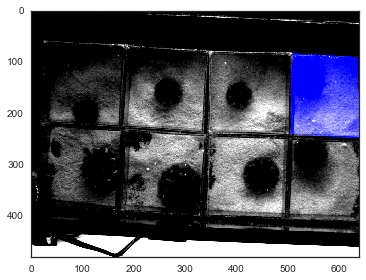

In [44]:
# Make grayscale image that is now RGB
im = np.dstack(3*[skimage.img_as_float(ic[0])])

# Max out blue channel
im[roi3,2] = skimage.dtype_limits(im)[1]

# Look at the image
with sns.axes_style('white'):
    skimage.io.imshow(im)

In [45]:
# Set up NumPy array to store total pixel intensity
total_int = np.empty(len(t))

# Look through and compute total intensity in the ROI
for i, im in enumerate(ic):
    total_int[i] = ic[i][roi_box3].sum()

C:\Users\andre_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 480 but corresponding boolean dimension is 166
C:\Users\andre_000\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:1794: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


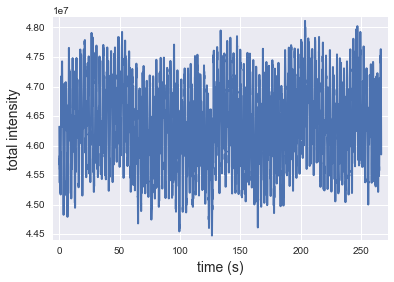

In [46]:
plt.plot(t, total_int)
plt.xlabel('time (s)')
plt.ylabel('total intensity')
plt.margins(0.02)

In [47]:
total_int -= total_int.mean()
total_int = 1 + 2 / (total_int.max() - total_int.min()) \
                * (total_int - total_int.max())

In [48]:
p = bokeh.plotting.figure(height=300, width=650, x_axis_label='time (s)',
                          y_axis_label='normalized intensity')
p.line(t, total_int, line_join='bevel')
bokeh.io.show(p)

In [49]:
# Jellyfish 5
verts4 = [(26.735349615665427, 216.49176495565314), (181.21542045676108, 226.45822113894963), (166.26573618181635, 385.92152007169358), (30.472770684401624, 372.21764281966091)]

In [50]:
ic = skimage.io.ImageCollection(im_glob, conserve_memory=True)
def squish_rgb(fname, **kwargs):
    """
    Only take one channel. (Need to explicitly have the **kwargs to play
    nicely with skimage.io.ImageCollection.)
    """
    im = skimage.io.imread(fname)
    return im[:,:,0]

ic = skimage.io.ImageCollection(im_glob, conserve_memory=True, 
                                load_func=squish_rgb)
fps = 15
t = np.arange(0, len(ic)) / fps
roi4, roi_bbox4, roi_box4 = bebi103.verts_to_roi(verts4, *ic[0].shape)

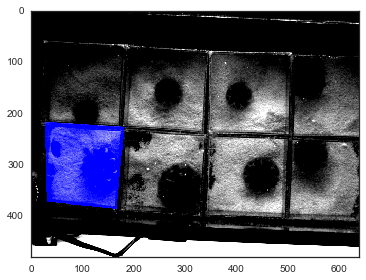

In [51]:
# Make grayscale image that is now RGB
im = np.dstack(3*[skimage.img_as_float(ic[0])])

# Max out blue channel
im[roi4,2] = skimage.dtype_limits(im)[1]

# Look at the image
with sns.axes_style('white'):
    skimage.io.imshow(im)

In [52]:
# Set up NumPy array to store total pixel intensity
total_int = np.empty(len(t))

# Look through and compute total intensity in the ROI
for i, im in enumerate(ic):
    total_int[i] = ic[i][roi_box4].sum()

C:\Users\andre_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 480 but corresponding boolean dimension is 170
C:\Users\andre_000\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:1794: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


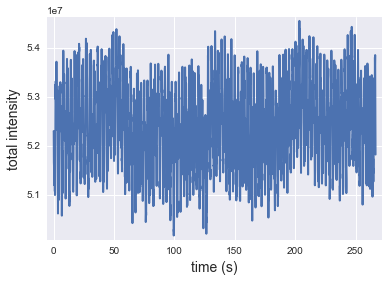

In [53]:
plt.plot(t, total_int)
plt.xlabel('time (s)')
plt.ylabel('total intensity')
plt.margins(0.02)

In [54]:
total_int -= total_int.mean()
total_int = 1 + 2 / (total_int.max() - total_int.min()) \
                * (total_int - total_int.max())

In [55]:
p = bokeh.plotting.figure(height=300, width=650, x_axis_label='time (s)',
                          y_axis_label='normalized intensity')
p.line(t, total_int, line_join='bevel')
bokeh.io.show(p)

In [56]:
# Jellyfish 6
verts5 = [(178.72380641093696, 231.44144923059787), (340.67871938950498, 236.42467732224617), (334.44968427494467, 399.62539732372625), (167.51154320472841, 388.4131341175177)]

In [57]:
ic = skimage.io.ImageCollection(im_glob, conserve_memory=True)
def squish_rgb(fname, **kwargs):
    """
    Only take one channel. (Need to explicitly have the **kwargs to play
    nicely with skimage.io.ImageCollection.)
    """
    im = skimage.io.imread(fname)
    return im[:,:,0]

ic = skimage.io.ImageCollection(im_glob, conserve_memory=True, 
                                load_func=squish_rgb)
fps = 15
t = np.arange(0, len(ic)) / fps
roi5, roi_bbox5, roi_box5 = bebi103.verts_to_roi(verts5, *ic[0].shape)

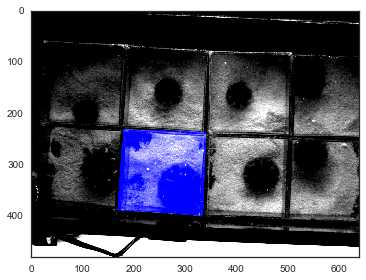

In [58]:
# Make grayscale image that is now RGB
im = np.dstack(3*[skimage.img_as_float(ic[0])])

# Max out blue channel
im[roi5,2] = skimage.dtype_limits(im)[1]

# Look at the image
with sns.axes_style('white'):
    skimage.io.imshow(im)

In [59]:
# Set up NumPy array to store total pixel intensity
total_int = np.empty(len(t))

# Look through and compute total intensity in the ROI
for i, im in enumerate(ic):
    total_int[i] = ic[i][roi_box5].sum()

C:\Users\andre_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 480 but corresponding boolean dimension is 169
C:\Users\andre_000\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:1794: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


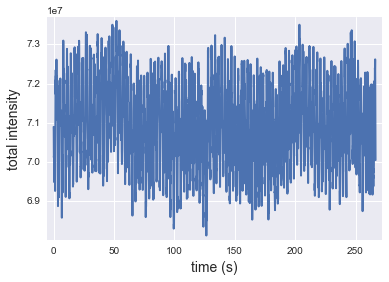

In [60]:
plt.plot(t, total_int)
plt.xlabel('time (s)')
plt.ylabel('total intensity')
plt.margins(0.02)

In [61]:
total_int -= total_int.mean()
total_int = 1 + 2 / (total_int.max() - total_int.min()) \
                * (total_int - total_int.max())

In [62]:
p = bokeh.plotting.figure(height=300, width=650, x_axis_label='time (s)',
                          y_axis_label='normalized intensity')
p.line(t, total_int, line_join='bevel')
bokeh.io.show(p)

In [63]:
# Jellyfish 7
verts6 = [(339.43291236659292, 242.65371243680647), (334.44968427494467, 407.10023946119861), (492.66717618477651, 413.32927457575892), (506.37105343680923, 245.14532648263059)]

In [64]:
ic = skimage.io.ImageCollection(im_glob, conserve_memory=True)
def squish_rgb(fname, **kwargs):
    """
    Only take one channel. (Need to explicitly have the **kwargs to play
    nicely with skimage.io.ImageCollection.)
    """
    im = skimage.io.imread(fname)
    return im[:,:,0]

ic = skimage.io.ImageCollection(im_glob, conserve_memory=True, 
                                load_func=squish_rgb)
fps = 15
t = np.arange(0, len(ic)) / fps
roi6, roi_bbox6, roi_box6 = bebi103.verts_to_roi(verts6, *ic[0].shape)

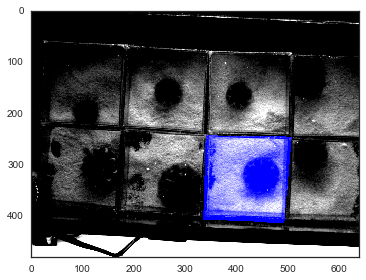

In [65]:
# Make grayscale image that is now RGB
im = np.dstack(3*[skimage.img_as_float(ic[0])])

# Max out blue channel
im[roi6,2] = skimage.dtype_limits(im)[1]

# Look at the image
with sns.axes_style('white'):
    skimage.io.imshow(im)

In [66]:
# Set up NumPy array to store total pixel intensity
total_int = np.empty(len(t))

# Look through and compute total intensity in the ROI
for i, im in enumerate(ic):
    total_int[i] = ic[i][roi_box6].sum()

C:\Users\andre_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 480 but corresponding boolean dimension is 172
C:\Users\andre_000\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:1794: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


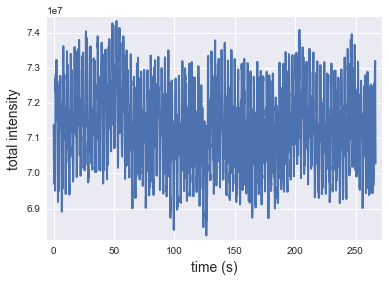

In [67]:
plt.plot(t, total_int)
plt.xlabel('time (s)')
plt.ylabel('total intensity')
plt.margins(0.02)

In [68]:
total_int -= total_int.mean()
total_int = 1 + 2 / (total_int.max() - total_int.min()) \
                * (total_int - total_int.max())

In [69]:
p = bokeh.plotting.figure(height=300, width=650, x_axis_label='time (s)',
                          y_axis_label='normalized intensity')
p.line(t, total_int, line_join='bevel')
bokeh.io.show(p)

In [70]:
# Jellyfish 8
verts7 = [(505.12524641389712, 243.89951945971853), (638.42659786548768, 246.39113350554265), (630.95175572801531, 415.82088862158309), (493.91298320768863, 413.32927457575892)]

In [71]:
ic = skimage.io.ImageCollection(im_glob, conserve_memory=True)
def squish_rgb(fname, **kwargs):
    """
    Only take one channel. (Need to explicitly have the **kwargs to play
    nicely with skimage.io.ImageCollection.)
    """
    im = skimage.io.imread(fname)
    return im[:,:,0]

ic = skimage.io.ImageCollection(im_glob, conserve_memory=True, 
                                load_func=squish_rgb)
fps = 15
t = np.arange(0, len(ic)) / fps
roi7, roi_bbox7, roi_box7 = bebi103.verts_to_roi(verts7, *ic[0].shape)

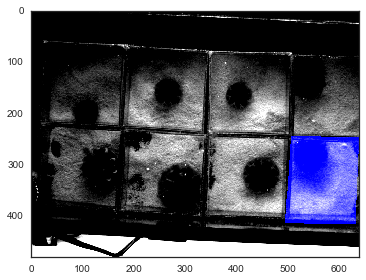

In [72]:
# Make grayscale image that is now RGB
im = np.dstack(3*[skimage.img_as_float(ic[0])])

# Max out blue channel
im[roi7,2] = skimage.dtype_limits(im)[1]

# Look at the image
with sns.axes_style('white'):
    skimage.io.imshow(im)

In [73]:
# Set up NumPy array to store total pixel intensity
total_int = np.empty(len(t))

# Look through and compute total intensity in the ROI
for i, im in enumerate(ic):
    total_int[i] = ic[i][roi_box7].sum()

C:\Users\andre_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 480 but corresponding boolean dimension is 173
C:\Users\andre_000\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:1794: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


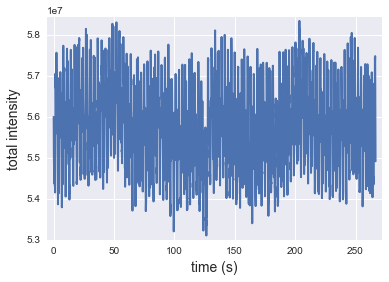

In [74]:
plt.plot(t, total_int)
plt.xlabel('time (s)')
plt.ylabel('total intensity')
plt.margins(0.02)

In [75]:
total_int -= total_int.mean()
total_int = 1 + 2 / (total_int.max() - total_int.min()) \
                * (total_int - total_int.max())

In [76]:
p = bokeh.plotting.figure(height=300, width=650, x_axis_label='time (s)',
                          y_axis_label='normalized intensity')
p.line(t, total_int, line_join='bevel')
bokeh.io.show(p)